# 2019년/2020년 특정 지역 월별 여행 횟수

In [1875]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

In [1876]:
# 폰트
font_path = '../malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [1877]:
month = ['1월','2월','3월','4월','5월','6월','7월','8월']

In [1878]:
test = pd.DataFrame({'여행월': month, '여행 횟수':0})
test

,여행월,여행 횟수
0,1월,0
1,2월,0
2,3월,0
3,4월,0
4,5월,0
5,6월,0
6,7월,0
7,8월,0


## 2019년 데이터 전처리

In [1879]:
# 데이터 불러오기
df_2019 = pd.read_csv('./tmap_prep_ver2/tmap_19_real_final.csv', index_col=0)
# 리셋 인덱스
df_2019.reset_index(drop= True, inplace= True)
# '지역 시군구'와 '여행월'로 정렬
df_2019.sort_values(['지역 시군구', '여행월'], inplace= True)
# 정렬 후 reset index
df_2019.reset_index(drop=True, inplace= True)
a_list = []
for i in range(0, len(df_2019)):
    if df_2019['지역 시군구'][i] == '전남 여수시':
        data = df_2019.iloc[i]
        a_list.append(data)
df2_2019 = pd.DataFrame(a_list)
df2_2019.reset_index(drop=True, inplace=True)
df2_2019

,지역 시군구,여행 횟수,여행월
0,전남 여수시,208,1월
1,전남 여수시,237,2월
2,전남 여수시,243,3월
3,전남 여수시,212,4월
4,전남 여수시,213,5월
5,전남 여수시,232,6월
6,전남 여수시,209,7월
7,전남 여수시,241,8월


In [1880]:
len(df_2019['지역 시군구'].unique())

161

In [1881]:
df_2019['지역 시군구'].unique()

array(['강원 강릉시', '강원 고성군', '강원 동해시', '강원 삼척시', '강원 속초시', '강원 양구군',
       '강원 양양군', '강원 영월군', '강원 원주시', '강원 인제군', '강원 정선군', '강원 철원군',
       '강원 춘천시', '강원 태백시', '강원 평창군', '강원 홍천군', '강원 화천군', '강원 횡성군',
       '경기 가평군', '경기 고양시', '경기 과천시', '경기 광명시', '경기 광주시', '경기 구리시',
       '경기 군포시', '경기 김포시', '경기 남양주시', '경기 동두천시', '경기 부천시', '경기 성남시',
       '경기 수원시', '경기 시흥시', '경기 안산시', '경기 안성시', '경기 안양시', '경기 양주시',
       '경기 양평군', '경기 여주시', '경기 연천군', '경기 오산시', '경기 용인시', '경기 의왕시',
       '경기 의정부시', '경기 이천시', '경기 전주시', '경기 창원시', '경기 천안시', '경기 청주시',
       '경기 파주시', '경기 평택시', '경기 포천시', '경기 포항시', '경기 하남시', '경기 화성시',
       '경남 거제시', '경남 거창군', '경남 고성군', '경남 김해시', '경남 남해군', '경남 밀양시',
       '경남 사천시', '경남 산청군', '경남 양산시', '경남 의령군', '경남 진주시', '경남 창녕군',
       '경남 통영시', '경남 하동군', '경남 함안군', '경남 함양군', '경남 합천군', '경북 경산시',
       '경북 경주시', '경북 고령군', '경북 구미시', '경북 군위군', '경북 김천시', '경북 문경시',
       '경북 봉화군', '경북 상주시', '경북 성주군', '경북 안동시', '경북 영덕군', '경북 영양군',
       '경북 영주시', '경북 영천시', '경북 예천군', '경북 울릉군', '경북 울진군', '경

In [1882]:
max = df2_2019['여행 횟수'].max()

In [1883]:
df3_2019 = df2_2019
del df3_2019['지역 시군구']

df3_2019 = df3_2019[['여행월', '여행 횟수']]

concat_2019 = pd.concat([test, df3_2019], axis= 'rows', ignore_index= True)
concat_2019.drop_duplicates(['여행월'], keep= 'last', inplace= True)

concat_2019.reset_index(drop= True,inplace= True)

concat_2019.rename(columns = {'여행 횟수' : '2019 여행 횟수'}, inplace = True)

concat_2019 = concat_2019.set_index(['여행월'])
concat_2019

,2019 여행 횟수
여행월,
1월,208
2월,237
3월,243
4월,212
5월,213
6월,232
7월,209
8월,241


In [1884]:
concat_2019.reset_index(inplace= True)

In [1885]:
change_2019 = pd.DataFrame({'여행월':month})

In [1886]:
change_2019['증감'] = 0

In [1887]:
for i in range(0, len(concat_2019)-1):
    change_2019['증감'][i+1] = concat_2019['2019 여행 횟수'][i+1] - concat_2019['2019 여행 횟수'][i]

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1888]:
concat_2019 = concat_2019.set_index('여행월')

In [1889]:
change_2019 = change_2019.set_index('여행월')

In [1890]:
change_2019

,증감
여행월,
1월,0
2월,29
3월,6
4월,-31
5월,1
6월,19
7월,-23
8월,32


## 2020년 데이터 전처리

In [1891]:
# 데이터 불러오기
df_2020 = pd.read_csv('./tmap_prep_ver2/tmap_20_real_final.csv', index_col=0)
# 리셋 인덱스
df_2020.reset_index(drop= True,inplace= True)
# '지역 시군구'와 '여행월'로 정렬
df_2020.sort_values(['지역 시군구', '여행월'], inplace= True)
# 정렬 후 reset index
df_2020.reset_index(drop=True, inplace= True)
a_list = []
for i in range(0, len(df_2020)):
    if df_2020['지역 시군구'][i] == '전남 여수시':
        data = df_2020.iloc[i]
        a_list.append(data)
df2_2020 = pd.DataFrame(a_list)
df2_2020.reset_index(drop=True, inplace=True)
df2_2020

,지역 시군구,여행 횟수,여행월
0,전남 여수시,236,1월
1,전남 여수시,217,2월
2,전남 여수시,214,3월
3,전남 여수시,210,4월
4,전남 여수시,258,5월
5,전남 여수시,217,6월
6,전남 여수시,236,7월
7,전남 여수시,287,8월


In [1892]:
df3_2020 = df2_2020
del df3_2020['지역 시군구']

df3_2020 = df3_2020[['여행월', '여행 횟수']]

concat_2020 = pd.concat([test, df3_2020], axis= 'rows', ignore_index= True)
concat_2020.drop_duplicates(['여행월'], keep= 'last', inplace= True)

concat_2020.reset_index(drop= True,inplace= True)

concat_2020.rename(columns = {'여행 횟수' : '2020 여행 횟수'}, inplace = True)

concat_2020 = concat_2020.set_index(['여행월'])
concat_2020

,2020 여행 횟수
여행월,
1월,236
2월,217
3월,214
4월,210
5월,258
6월,217
7월,236
8월,287


In [1893]:
concat_2020.reset_index(inplace= True)
change_2020 = pd.DataFrame({'여행월':month})
change_2020['증감'] = 0
for i in range(0, len(concat_2020)-1):
    change_2020['증감'][i+1] = concat_2020['2020 여행 횟수'][i+1] - concat_2020['2020 여행 횟수'][i]
concat_2020 = concat_2020.set_index('여행월')
change_2020 = change_2020.set_index('여행월')
change_2020

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,증감
여행월,
1월,0
2월,-19
3월,-3
4월,-4
5월,48
6월,-41
7월,19
8월,51


In [1894]:
concat_2020

,2020 여행 횟수
여행월,
1월,236
2월,217
3월,214
4월,210
5월,258
6월,217
7월,236
8월,287


In [1895]:
concat_total = pd.concat([concat_2019, concat_2020], axis= 'columns', ignore_index=False)
concat_total

,2019 여행 횟수,2020 여행 횟수
여행월,,
1월,208,236
2월,237,217
3월,243,214
4월,212,210
5월,213,258
6월,232,217
7월,209,236
8월,241,287


## 그림 그리기 1

(0.0, 293.0)

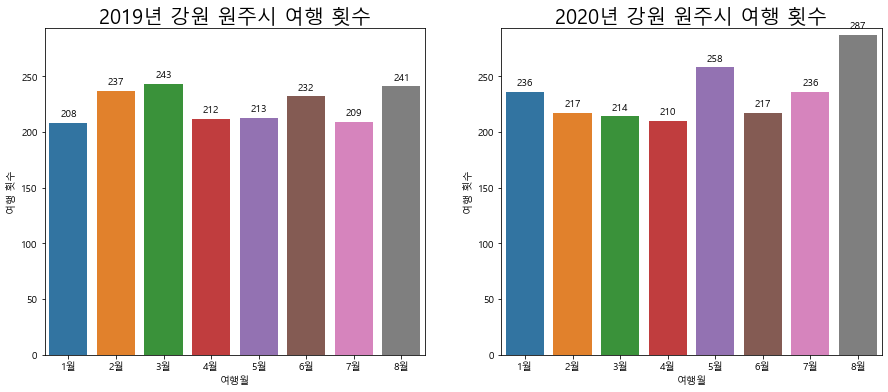

In [1896]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2) 
travel_2019 = sns.barplot(data = df2_2019, x= '여행월', y= '여행 횟수', ax= ax1)
travel_2019.set_title('2019년 강원 원주시 여행 횟수', size = 20) 
for p in travel_2019.patches:
    travel_2019.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
travel_2019.set_ylim([0, max+50]) 

travel_2020 = sns.barplot(data = df2_2020, x= '여행월', y= '여행 횟수', ax= ax2)
travel_2020.set_title('2020년 강원 원주시 여행 횟수', size = 20) 
for p in travel_2020.patches:
    travel_2020.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
travel_2020.set_ylim([0, max+50]) 

## 그림 그리기 2

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, '2019/2020년 강원 원주시 여행 횟수')

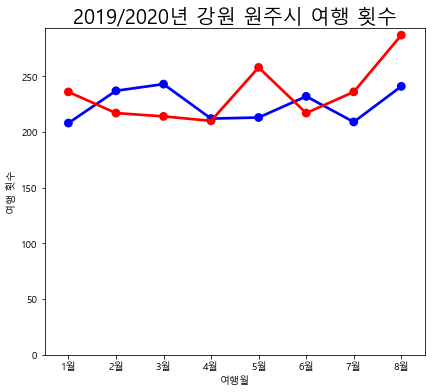

In [1897]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,1) 
travel_2019 = sns.pointplot(data = df2_2019, x= '여행월', y= '여행 횟수', ax= ax1, color= 'b')
travel_2019.set_ylim([0, max+50]) 

travel_2020 = sns.pointplot(data = df2_2020, x= '여행월', y= '여행 횟수', ax= ax2, color= 'r')
travel_2020.set_ylim([0, max+50]) 

travel_2019.set_title('2019/2020년 강원 원주시 여행 횟수', size = 20) 

## 그림 그리기 3

In [1898]:
# concat을 concat
concat_total = pd.concat([concat_2019, concat_2020], axis= 'columns', ignore_index= False)
concat_total

,2019 여행 횟수,2020 여행 횟수
여행월,,
1월,208,236
2월,237,217
3월,243,214
4월,212,210
5월,213,258
6월,232,217
7월,209,236
8월,241,287


Text(0.5, 1.0, '2019/2020년 전남 여수시 여행 횟수')

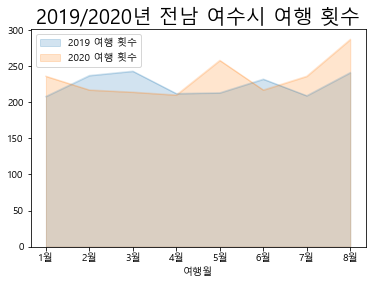

In [1899]:
# 그림그리기
ax = concat_total.plot(kind= 'area',stacked= False, alpha= 0.2)
ax.set_title('2019/2020년 전남 여수시 여행 횟수', size = 20) 

In [1900]:
# 저장
# ax.figure.savefig('./tmap_graph/전남_여수시.png')

## 그림 그리기 4

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


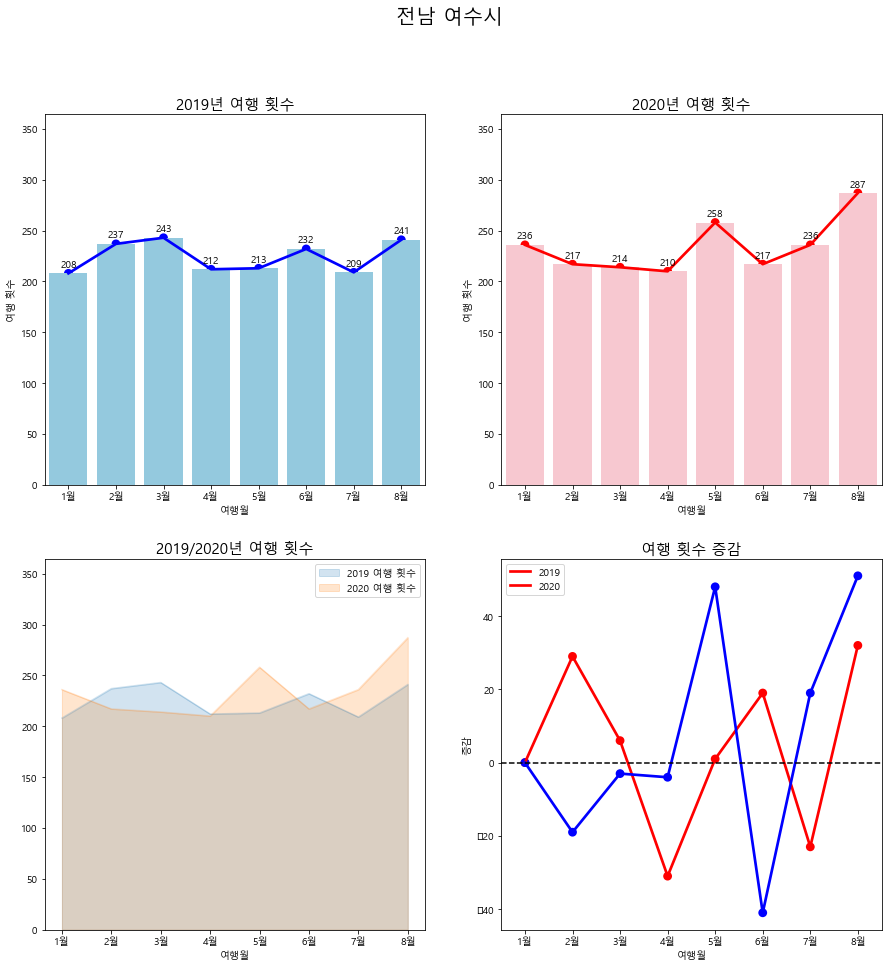

In [1901]:
fig = plt.figure(figsize = (15, 15))
fig.suptitle('전남 여수시', size= 20)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2) 
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

travel_2019 = sns.barplot(data = df2_2019, x= '여행월', y= '여행 횟수', ax= ax1, color= 'skyblue')
travel_2019 = sns.pointplot(data = df2_2019, x= '여행월', y= '여행 횟수', ax= ax1, color= 'b')
travel_2019.set_title('2019년 여행 횟수', size = 15) 
for p in travel_2019.patches:
    travel_2019.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
travel_2019.set_ylim([0, max*1.5]) 

travel_2020 = sns.barplot(data = df2_2020, x= '여행월', y= '여행 횟수', ax= ax2, color= 'pink')
travel_2020 = sns.pointplot(data = df2_2020, x= '여행월', y= '여행 횟수', ax= ax2, color= 'r')
travel_2020.set_title('2020년 여행 횟수', size = 15) 
for p in travel_2020.patches:
    travel_2020.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
travel_2020.set_ylim([0, max*1.5]) 

together = concat_total.plot(kind= 'area',stacked= False, alpha= 0.2, ax= ax3)
together.set_title('2019/2020년 여행 횟수', size = 15) 
together.set_ylim([0, max*1.5])

labels = ['2019', '2020']
change_2019 = sns.pointplot(data = change_2019, x= change_2019.index, y= '증감', color= 'r', label= labels[0], ax= ax4)
change_2020 = sns.pointplot(data = change_2020, x= change_2020.index, y= '증감', color= 'b', label= labels[1], ax= change_2019)
change_2020.set_title('여행 횟수 증감', size = 15) 
change_2020.axhline(y=0, color = 'black', linestyle= '--')
ax4.legend(labels)

In [1903]:
fig.savefig('./tmap_graph/전남_여수시.png')

## 그림 그리기 5

In [1902]:

travel_2019 = sns.pointplot(data = concat_2019, x= concat_2019.index, y= '증감', color= 'r', label= '2019')
travel_2019.set_title('2019년 전남 여수시 여행 횟수 증감', size = 15) 
for p in travel_2019.patches:
    travel_2019.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
travel_2019.axhline(y=0, color = 'black', linestyle= '--')
# travel_2019.set_ylim([0, max*1.5]) 

travel_2020 = sns.pointplot(data = concat_2020, x= concat_2020.index, y= '증감', color= 'b', label= '2020')
travel_2020.set_title('2020년 전남 여수시 여행 횟수 증감', size = 15) 
for p in travel_2020.patches:
    travel_2020.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
travel_2020.axhline(y=0, color = 'black', linestyle= '--')
# travel_2019.set_ylim([0, max*1.5]) 
# plt.legend(labels=['2019', '2020'])

ValueError: Could not interpret input '증감'